In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import tqdm

%matplotlib widget

In [6]:
def calculate_penetration_probability(file_path, delimiter='\t', barrier_x=210, isPlot=True):
    """
    Calculate the penetration probability for the given data file.
    
    Parameters:
    - file_path: str, path to the input file.
    - delimiter: str, delimiter used in the file.
    - barrier_x: float, x-value corresponding to the barrier.
    
    Returns:
    - dict containing total area, barrier area, penetration probability, and error.
    """
    # Read the data
    data = pd.read_csv(file_path, delimiter=delimiter)
    x = data['x'].values
    n = data['n'].values
    
    # Find the index corresponding to barrier_x
    barrier_index = data[data['x'] == barrier_x].index[0]
    
    # Calculate areas using Simpson's rule
    total_area = simps(n, x)
    barrier_area = simps(n[:barrier_index+1], x[:barrier_index+1])
    penetration_probability_simpson = barrier_area / total_area
    
    # Calculate penetration probability using Trapezoidal rule
    total_area_trapz = np.trapz(n, x)
    barrier_area_trapz = np.trapz(n[:barrier_index+1], x[:barrier_index+1])
    penetration_probability_trapz = barrier_area_trapz / total_area_trapz
    
    # Calculate error between Simpson's rule and Trapezoidal rule
    error_percentage = np.abs(penetration_probability_trapz - penetration_probability_simpson) / penetration_probability_simpson * 100
    
    # Optional: Visualization
    if(isPlot):
        plt.close('all')
        plt.plot(x[:barrier_index+1], n[:barrier_index+1], marker='o', label='n vs x (Barrier)')
        plt.plot(x, n, label='n vs x (Full Curve)', linestyle='--', alpha=0.7)
        plt.axvline(barrier_x, color='red', linestyle='--', label=f'Barrier at x = {barrier_x}')
        plt.xlabel('x')
        plt.ylabel('n')
        plt.title(f'Curve of n vs x for {file_path}')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    # Return results
    return {
        'file': file_path,
        'total_area_simpson': total_area,
        'barrier_area_simpson': barrier_area,
        'penetration_probability_simpson': penetration_probability_simpson,
        'penetration_probability_trapz': penetration_probability_trapz,
        'error_percentage': error_percentage
    }

In [11]:
files = [
    'AlGaNchannelHEMT_0nmAlN_withbackbarrier.txt',
    'AlGaNchannelHEMT_0.5nmAlN_withbackbarrier.txt',
    'AlGaNchannelHEMT_1nmAlN_withbackbarrier.txt',
    'AlGaNchannelHEMT_1.5nmAlN_withbackbarrier.txt',
    'AlGaNchannelHEMT_2nmAlN_withbackbarrier.txt',
    'AlGaNchannelHEMT_2.5nmAlN_withbackbarrier.txt',
    'AlGaNchannelHEMT_3nmAlN_withbackbarrier.txt'
]

results = []
for file in files:
    result = calculate_penetration_probability(file, barrier_x=210, isPlot=False)
    results.append(result)
    # print(f"Results for {file}:\n", result)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8960\3056879964.py:22: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_area = simps(n, x)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8960\3056879964.py:23: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  barrier_area = simps(n[:barrier_index+1], x[:barrier_index+1])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8960\3056879964.py:22: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_area = simps(n, x)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8960\3056879964.py:23: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  barrier_area = simps(n[:barrier_index+1], x[:barrier_index+1])
C:\Users\len

In [12]:
results

[{'file': 'AlGaNchannelHEMT_0nmAlN_withbackbarrier.txt',
  'total_area_simpson': 1.2107068472872046e+21,
  'barrier_area_simpson': 1.4833558676542646e+20,
  'penetration_probability_simpson': 0.12251982145619945,
  'penetration_probability_trapz': 0.12240586004204268,
  'error_percentage': 0.09301467534174869},
 {'file': 'AlGaNchannelHEMT_0.5nmAlN_withbackbarrier.txt',
  'total_area_simpson': 1.2169485527230746e+21,
  'barrier_area_simpson': 9.739035981420427e+18,
  'penetration_probability_simpson': 0.008002832954300423,
  'penetration_probability_trapz': 0.007999564736306931,
  'error_percentage': 0.040838263301944976},
 {'file': 'AlGaNchannelHEMT_1nmAlN_withbackbarrier.txt',
  'total_area_simpson': 1.2498813104420715e+21,
  'barrier_area_simpson': 5.2067001787152736e+17,
  'penetration_probability_simpson': 0.0004165755688333088,
  'penetration_probability_trapz': 0.00041639363349364685,
  'error_percentage': 0.04367403018171921},
 {'file': 'AlGaNchannelHEMT_1.5nmAlN_withbackbarrier

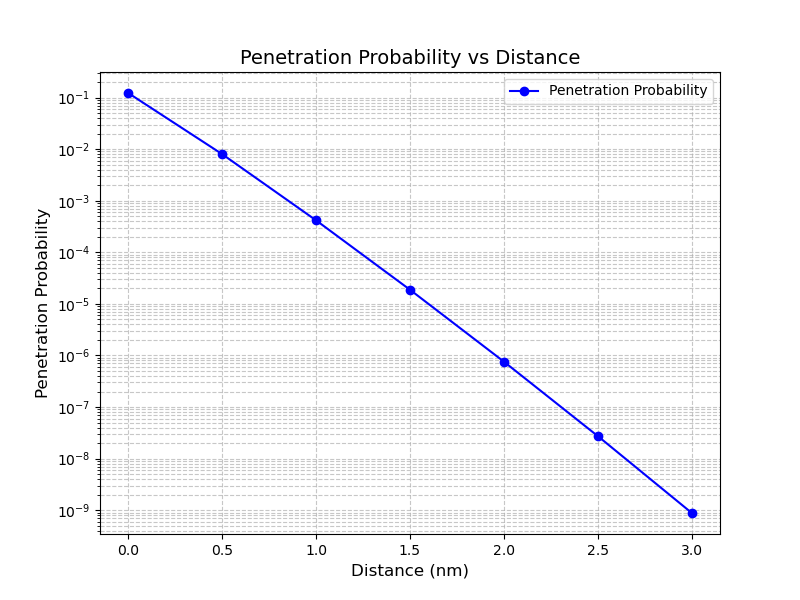

In [13]:
# Extract distances (in nm) and penetration probabilities
distances = [float(file['file'].split('AlGaNchannelHEMT_')[1].split('nmAlN')[0]) for file in results]
penetration_probabilities = [file['penetration_probability_simpson'] for file in results]

# Plotting
plt.close('all')
plt.figure(figsize=(8, 6))
plt.plot(distances, penetration_probabilities, marker='o', linestyle='-', color='b', label='Penetration Probability')
plt.yscale('log')  # Use log scale for y-axis since the values vary significantly
plt.xlabel('Distance (nm)', fontsize=12)
plt.ylabel('Penetration Probability', fontsize=12)
plt.title('Penetration Probability vs Distance', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.show()

In [14]:
print(f"Penetration probabilities: \n{penetration_probabilities}")

Penetration probabilities: 
[0.12251982145619945, 0.008002832954300423, 0.0004165755688333088, 1.87852005002513e-05, 7.578693392851842e-07, 2.729944132738147e-08, 8.835064657525907e-10]
